In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [17]:
train = pd.read_table("liar_dataset/train.tsv", sep = '\t', header=None)
test = pd.read_table("liar_dataset/test.tsv", sep = '\t', header=None)
valid = pd.read_table("liar_dataset/valid.tsv", sep = '\t', header=None)

In [23]:
train.head()


pandas.core.frame.DataFrame

In [24]:
cols = ['ID', 'label', 'statement', 'subject', 'speaker', 'job_title', 'state', 'party', '1', '2', '3', '4', '5', 'venue']
train.columns = cols

In [167]:
train.head()

,ID,label,statement,subject,speaker,job_title,state,party,1,2,3,4,5,venue,sent_len,score
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,11,-1
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,24,0
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,19,2
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,12,-1
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,10,0


In [95]:
labels = sorted(train['label'].unique())
label_to_idx = {k:v+1 for k,v in zip(labels, range(len(labels)))}
idx_to_labels = {v:k for k,v in label_to_idx.items()}


In [98]:
label_to_idx, idx_to_labels

({'barely-true': 1,
  'false': 2,
  'half-true': 3,
  'mostly-true': 4,
  'pants-fire': 5,
  'true': 6},
 {1: 'barely-true',
  2: 'false',
  3: 'half-true',
  4: 'mostly-true',
  5: 'pants-fire',
  6: 'true'})

In [99]:
score = {
    'true': 3,
    'mostly-true': 2, 
    'barely-true': 1,
    'half-true': 0,
    'false': -1,
    'pants-fire': -2
}
train['score'] = train['label'].apply(lambda x : score[x])

In [100]:
train['score'].describe()

count    10240.000000
mean         0.677051
std          1.570152
min         -2.000000
25%         -1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: score, dtype: float64

In [40]:
label_to_idx, idx_to_labels

({'barely-true': 1,
  'false': 2,
  'half-true': 3,
  'mostly-true': 4,
  'pants-fire': 5},
 {1: 'barely-true',
  2: 'false',
  3: 'half-true',
  4: 'mostly-true',
  5: 'pants-fire'})

<BarContainer object of 6 artists>

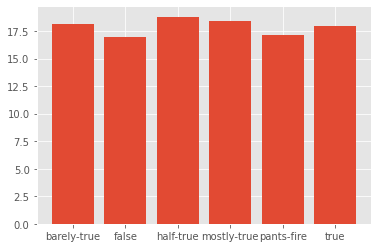

In [60]:
#Statement length : No particular distinction
train['sent_len'] = train['statement'].apply(lambda x : len(x.split(" "))) 
a = train.groupby('label')['sent_len'].agg({np.mean}).reset_index()
plt.bar(a['label'], a['mean'])

In [62]:
train.loc[10, 'subject']

'elections'

In [113]:
b = train.groupby(['speaker'])['score'].agg({'mean', 'count'}).reset_index()

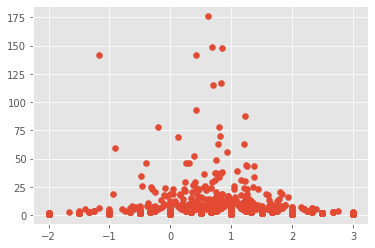

In [221]:
plt.scatter(b[b['count'] < 200]['mean'], b[b['count'] < 200]['count'])

In [134]:
neg = b[(b['mean'] <=-0.4) & (b['count'] >=30)]

In [131]:
neg.describe()

,count,mean
count,19.000000,19.000000
mean,45.842105,-0.344148
std,63.406329,0.337082
min,11.000000,-1.176056
25%,17.500000,-0.426421
50%,23.000000,-0.304348
75%,40.500000,-0.097222
max,273.000000,0.000000


<BarContainer object of 3 artists>

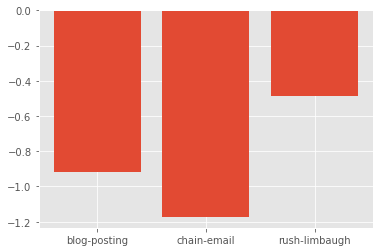

In [135]:
plt.bar(neg['speaker'], neg['mean'])

In [85]:
b = b.sort_values(by=['statement'], ascending=False)
c = b[b['statement'] > 2]

In [148]:
# Job title
job_title_df = train.groupby(['job_title'])['score'].agg({'mean', 'count'}).reset_index()

In [159]:
filter_df = job_title_df[(job_title_df['count'] < 30)]
filter_df

,job_title,count,mean
0,secretary-general of the United Nations,1,2.000000
1,4th Congressional District's congressman,2,1.500000
2,501 (c) (4) educational group,1,0.000000
3,8th District congressional candidate,5,1.400000
4,9-12 member in Tampa,1,1.000000
...,...,...,...
1179,"vice president, Hilex Poly Co.",1,-1.000000
1180,"vice president, Rhode Island State Association...",1,2.000000
1181,video,1,1.000000
1182,website,1,0.000000


Text(0, 0.5, 'count')

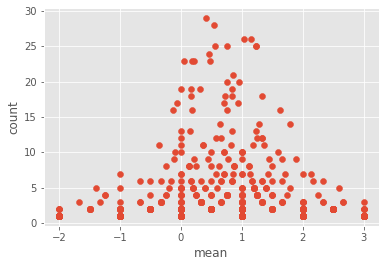

In [160]:
# plt.scatter(job_title_df['mean'], job_title_df['count'])
# plt.xlabel('mean')
# plt.ylabel('count')

plt.scatter(filter_df['mean'], filter_df['count'])
plt.xlabel('mean')
plt.ylabel('count')

In [162]:
def create_mean_cats(row):
    if row >= 2: 
        return 2
    if row <= -1: 
        return 0
    else: 
        return 1
job_title_df['job_title_mean_cat'] = job_title_df['mean'].apply(create_mean_cats)

In [168]:
train = pd.merge(train, job_title_df[['job_title', 'job_title_mean_cat']], on='job_title', how='left')

### Let's see what type of values are there, need to clean up the job titles more

In [174]:
train[train['job_title_mean_cat'] == 2]['job_title'].head(10)

72                             Former state Senator
73     President and CEO of Honeywell International
96                              lawyer, businessman
98                        Columnist and commentator
122            Constable, Travis County, Precinct 5
124                                    Ohio auditor
136                      politican action committee
176              Former White House Press Secretary
190            attorney and contributor to Fox News
200                     Mayor, Point Pleasant Beach
Name: job_title, dtype: object

# Party

In [178]:
party_df= train.groupby('party')['score'].agg({'mean', 'count'}).reset_index()

In [183]:
party_df.sort_values(by=['mean', 'count'], ascending=False)

,party,count,mean
7,education-official,2,2.000000
8,government-body,1,2.000000
13,liberal-party-canada,1,2.000000
2,business-leader,9,1.333333
10,independent,147,1.251701
20,state-official,20,1.200000
15,newsmaker,56,1.053571
3,columnist,35,1.028571
17,ocean-state-tea-party-action,1,1.000000
5,democrat,3336,0.965827


In [184]:
rep = train[train['party']=='republican']
demo = train[train['party']=='democrat']
inde = train[train['party']=='independent']
state = train[train['party']=='state-official']
news = train[train['party']=='newsmaker']
column = train[train['party']=='columnist']

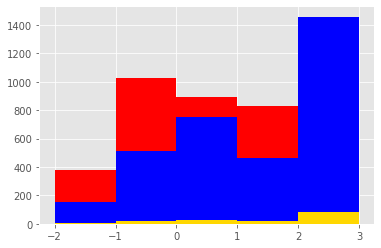

In [215]:
plt.hist(rep['score'], bins = [-2, -1, 0, 1, 2, 3], color ='red')
plt.hist(demo['score'], bins = [-2, -1, 0, 1, 2, 3], color='blue')
plt.hist(inde['score'], bins = [-2, -1, 0, 1, 2, 3], color='gold')
#plt.hist(news['score'], bins = [-2, -1, 0, 1, 2, 3], color='black')
#plt.hist(state['score'], bins = [-2, -1, 0, 1, 2, 3], color='pink')
plt.show()

### Selecting representative, democratic, independant and others

In [217]:
city_df = train.groupby(['state'])['score'].agg({'mean', 'count'}).reset_index()

In [219]:
city_df['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Atlanta',
       'California', 'California ', 'China', 'Colorado', 'Colorado ',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida',
       'Florida ', 'Georgia', 'Georgia ', 'Hawaii', 'Idaho', 'Illinois',
       'Illinois ', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Massachusetts ', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Hampshire ', 'New Jersey',
       'New Mexico', 'New York', 'New York ', 'None', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Oregon ',
       'PA - Pennsylvania', 'Pennsylvania', 'Qatar', 'Rhode Island',
       'Rhode Island ', 'Rhode island', 'Russia', 'South Carolina',
       'South Dakota', 'Tennesse', 'Tennessee', 'Tex', 'Texas',
       'United Kingdom', 'Unknown', 'Utah', 'Vermont', 'Virgiia',
       'Virgina', 'Virginia', 'Virgini